# CSE 25 – Introduction to Artificial Intelligence
## Worksheet 7 - Supplementary

This worksheet is designed to help you explore and visualize key concepts from class, such as linear models, hyperplanes, and the XOR problem. Work through the cells, experiment with the interactive widgets, and make notes as needed.

**Note:** There is nothing for you to submit for this.

## Linear models with more than one input features

Consider the rather simple problem of computing the total amount of money given a specific number of *dimes* and specific number of *nickels*.

We want to predict the total value using a linear model that takes the number of nickels and dimes as input features. This is an example of a linear regression problem with two variables.

If we think about an input variable $x_1$ representing the number of nickels and an input variable $x_2$ representing the number of dimes, we can use the following equation to compute the total output, $y$: $$y= 5x_1 + 10x_2$$

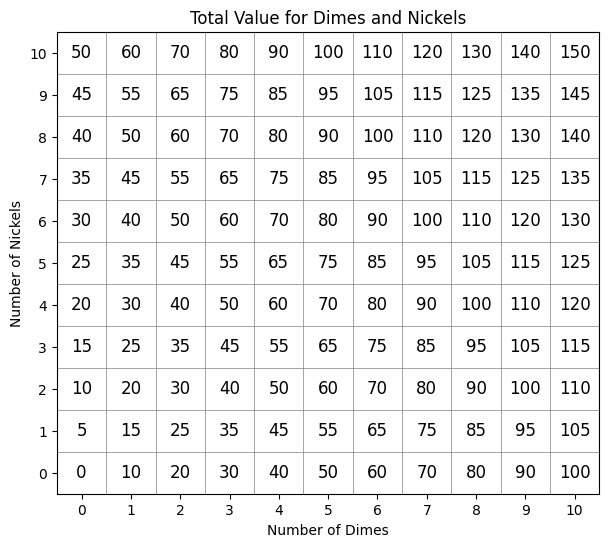

In [9]:
import matplotlib.pyplot as plt

dimes_range = range(0, 11)
nickels_range = range(0, 11)
grid = []

for n in nickels_range:
    row = []
    for d in dimes_range:
        total = 5 * n + 10 * d
        row.append(total)
    grid.append(row)

fig, ax = plt.subplots(figsize=(7,6))
ax.set_xticks(range(len(dimes_range)))
ax.set_yticks(range(len(nickels_range)))
ax.set_xticklabels(dimes_range)
ax.set_yticklabels(nickels_range)
ax.set_xlabel('Number of Dimes')
ax.set_ylabel('Number of Nickels')
ax.set_title('Total Value for Dimes and Nickels')

# Draw grid lines
for i in range(len(nickels_range)+1):
    ax.axhline(i-0.5, color='gray', linewidth=0.5)
for j in range(len(dimes_range)+1):
    ax.axvline(j-0.5, color='gray', linewidth=0.5)

# Fill in numbers
for i, n in enumerate(nickels_range):
    for j, d in enumerate(dimes_range):
        ax.text(j, i, f"{grid[i][j]}", va='center', ha='center', fontsize=12)

ax.set_xlim(-0.5, len(dimes_range)-0.5)
ax.set_ylim(-0.5, len(nickels_range)-0.5)
ax.invert_yaxis()

plt.gca().invert_yaxis()
plt.show()

#### Plotting the nickel and dime equation

If we create a 3D plot with x1, x2, and y as the three axes, we can see that the $$y= 5x_1 + 10x_2$$ equation is the equation for a plane.

In [10]:
# Convert the following to 3D plotly plot:
# Prepare data for 3D plot
import plotly.graph_objs as go


all_x1 = []
all_x2 = []
all_y = []
for i, n in enumerate(nickels_range):
    for j, d in enumerate(dimes_range):
        all_x1.append(n)
        all_x2.append(d)
        all_y.append(grid[i][j])
import plotly.graph_objs as go

# Create a 3D scatter plot using plotly
scatter = go.Scatter3d(
    x=all_x1,
    y=all_x2,
    z=all_y,
    mode='markers',
    marker=dict(size=5, color=all_y, colorscale='Viridis'),
    name='Total Value'
)

layout = go.Layout(
    scene=dict(
        xaxis_title='# Nickels',
        yaxis_title='# Dimes',
        zaxis_title='Total'
    ),
    title='3D Plot: Total Value for Dimes and Nickels'
)
layout.update(width=800, height=600)
fig = go.Figure(data=[scatter], layout=layout, )
fig.show()

### Fitting a Plane to Unknown Coins

Now let's try to fit a plane through some unknown coins! 

Run the next two cells and use the sliders to adjust the weights `w1` and `w2` for each coin.  `x1` and `x2` denote the numbers of each type of coin.

**Hint:** The plane should perfectly fit the data points—when you find the correct values, the plane will pass through all the points.

In [6]:
# Unknown Coins! 

# Total (y), Num coins 1 (x1), Num coins 2 (x2)
y =  [44, 23, 38, 43, 15, 18, 17, 30, 28, 21]
x1 = [ 8,  5, 10,  9,  1,  6,  5,  4,  6,  3]
x2 = [10,  4,  4,  8,  6,  0,  1,  9,  5,  6]

In [7]:
from ipywidgets import interact, FloatSlider
import numpy as np

import plotly.graph_objs as go

def plot_plane_fit(w1=5.0, w2=10.0):
    # Scatter plot of the data points
    scatter = go.Scatter3d(
        x=x1, y=x2, z=y,
        mode='markers',
        marker=dict(size=8, color='red'),
        name='Data points'
    )

    # Create a meshgrid for the plane
    x1_grid = np.linspace(min(x1), max(x1), 10)
    x2_grid = np.linspace(min(x2), max(x2), 10)
    X1, X2 = np.meshgrid(x1_grid, x2_grid)
    Y = w1 * X1 + w2 * X2

    plane = go.Surface(
        x=X1, y=X2, z=Y,
        opacity=0.5,
        # colorscale='Blues',
        showscale=False,
        name='Fit plane'
    )

    layout = go.Layout(
        scene=dict(
            xaxis_title='x1 (nickels)',
            yaxis_title='x2 (dimes)',
            zaxis_title='y (total value)'
        ),
        title=f'Fit: y = {w1:.0f}*x1 + {w2:.0f}*x2',
        margin=dict(l=0, r=0, b=0, t=30)
    )

    fig = go.Figure(data=[scatter, plane], layout=layout)
    fig.show()

interact(
    plot_plane_fit,
    w1=FloatSlider(value=1, min=0, max=10, step=1, description='w1'),
    w2=FloatSlider(value=1, min=0, max=10, step=1, description='w2')
)

interactive(children=(FloatSlider(value=1.0, description='w1', max=10.0, step=1.0), FloatSlider(value=1.0, des…

<function __main__.plot_plane_fit(w1=5.0, w2=10.0)>

### What is a Hyperplane?

A **hyperplane** is a generalization of the concept of a plane to higher dimensions. In two dimensions, this is a line; in three dimensions, it is a flat surface or a plane. When we move to four or more dimensions, we call this flat, infinitely extending surface a hyperplane.

- In **2D**, a hyperplane is a line.
- In **3D**, a hyperplane is a plane.
- In **nD** (where n > 3), a hyperplane is an (n-1)-dimensional subspace.

## The XOR Problem: A Challenge for Perceptrons


The XOR (exclusive OR) function outputs true only when its two binary inputs differ. 

| X_1| X_2 | XOR |
|----|----|-----|
| 0  | 0  |  0  |
| 0  | 1  |  1  |
| 1  | 0  |  1  |
| 1  | 1  |  0  |

If we plot the four possible input combinations, we'll see that no single straight line can separate the points where XOR is true from those where it is false.

In the next cell - Try changing the values of the perceptron parameters (`w1`, `w2`, and `b`). Can you find any set of parameters that perfectly separates the blue and red points?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# XOR dataset: inputs and labels
X_xor = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y_xor = [-1, 1, 1, -1]  # XOR: output is 1 if exactly one input is 1, else -1

def plot_xor_perceptron(w1=0.0, w2=0.0, b=0.0):
    w = [w1, w2]
    # Separate points by class
    X_pos = [x for x, y in zip(X_xor, y_xor) if y == 1]
    X_neg = [x for x, y in zip(X_xor, y_xor) if y == -1]

    plt.figure(figsize=(4, 4))
    plt.scatter([x[0] for x in X_pos], [x[1] for x in X_pos], color='blue', marker='x', s=100, label='Class +1')
    plt.scatter([x[0] for x in X_neg], [x[1] for x in X_neg], color='red', marker='o', s=100, label='Class -1')

    # Plot decision boundary: w1*x1 + w2*x2 + b = 0
    x1_vals = np.linspace(-0.5, 1.5, 100)
    if w1 == 0 and w2 == 0:
        plt.text(0.5, 0.5, "No decision boundary\n(w1=0, w2=0)", 
                 fontsize=12, color='purple', ha='center', va='center', transform=plt.gca().transAxes)
    elif w2 != 0:
        x2_vals = [-(w1/w2)*x1 - b/w2 for x1 in x1_vals]
        plt.plot(x1_vals, x2_vals, color='green', linestyle='--', label='Decision boundary')
    elif w1 != 0:
        plt.axvline(x=-b/w1, color='green', linestyle='--', label='Decision boundary')

    # Show predictions for each point
    for x, y_true in zip(X_xor, y_xor):
        score = w[0] * x[0] + w[1] * x[1] + b
        y_pred = 1 if score >= 0 else -1
        plt.text(x[0]+0.05, x[1]+0.05, f'Pred: {y_pred}', fontsize=10, color='black')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('XOR: Perceptron Decision Boundary')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    # plt.legend()
    # Move the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


interact(
    plot_xor_perceptron,
    w1=FloatSlider(value=1, min=-5, max=5, step=0.1, description='w1'),
    w2=FloatSlider(value=1, min=-5, max=5, step=0.1, description='w2'),
    b=FloatSlider(value=0, min=-5, max=5, step=0.1, description='b')
)

print("Try different values for w1, w2, and b. You will see that no straight line can separate the XOR classes perfectly.")

interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

Try different values for w1, w2, and b. You will see that no straight line can separate the XOR classes perfectly.


#### Limitation of the Perceptron

The inability to solve the XOR problem is a fundamental limitation of the single-layer perceptron. A single perceptron can only represent decision boundaries that are linear.

The XOR dataset is **not linearly separable**, meaning no single straight line can separate the classes. As a result, a single perceptron cannot solve the XOR problem.

#### Historical Context

The perceptron was introduced by Frank Rosenblatt in 1958 as one of the earliest models of an artificial neuron.[1]  

Later theoretical analysis by Marvin Minsky and Seymour Papert showed that single-layer perceptrons are incapable of computing certain functions, including XOR.[2]


#### References

[1]: Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain. Psychological Review, 65(6), 386–408. https://doi.org/10.1037/h0042519

[2]: Minsky, M., & Papert, S. (1969). Perceptrons. M.I.T. Press.


#### Overcoming the Limitation

A couple of ways to overcome this limitation:

- **Feature engineering:** By adding new features (such as a product term `x1 * x2`), you can make the XOR problem linearly separable. You’ll explore this approach in Programming Assignment 1 (PA1).

- **Multi-layer perceptrons:** By stacking perceptrons in layers (i.e., building multi-layer perceptrons), we can represent non-linear decision boundaries and solve problems like XOR. This will be covered in upcoming lectures.